# README.md

###For each pt with an ADT ending date, find its T date and T value around 6months later

# Step1, read from spreadsheet, clean up, and get statistics

In [64]:
import numpy as np
import pandas as pd
import sys, getopt
import csv
from datetime import datetime
from datetime import timedelta, date
import itertools

from matplotlib import pyplot
from pylab import *
import matplotlib.pyplot as plt

%matplotlib inline  
import seaborn as sns

In [44]:
df1=pd.read_csv("with_ADT_window.csv", header=0)
df1.fillna('', inplace=True)
df1['inital_ADT_end_date'] = pd.to_datetime(df1['inital_ADT_end_date'])

df2=pd.read_excel("pca_tresults_20210119_BP.xlsx", header=0)
#df3=pd.read_csv("just_start_empty.csv", header=0)

In [46]:
df1[:1]

,person_id,inital_ADT_start_date,inital_ADT_end_date,Inital_ADT_timewindow,Inital_ADT_time_window_days,index1
0,2,2009-02-26,2017-02-01,2897 days 00:00:00.000000000,2897.0,0


In [69]:
df2[:1]

,person_id,result_date,test_results
0,2,2006-09-05,351


In [47]:
df2_pt[:4]

,person_id,result_date,test_results
0,2,2006-09-05,351
1,2,2007-01-09,304
2,2,2007-05-17,259
3,2,2007-06-12,382


In [70]:
list_pts_adt_table=df1["person_id"].to_list()
list_pts_tvalue_table=df2["person_id"].to_list()

In [72]:
print("pt number in adt table is:")
print(len(list_pts_adt_table))
print("")
print("pt number in t value table is:")
print(len(list_pts_tvalue_table))

pt number in adt table is:
792

pt number in t value table is:
18643


In [48]:
index_list=df2.columns
index_list

Index(['person_id', 'cancer_type_id', 'year_of_diagnosis',
       'month_of_diagnosis', 'day_of_diagnosis', 'dx_date', 'result_date',
       'loinc_code', 'source_test_name', 'test_results'],
      dtype='object')

In [49]:
print(df2.shape)
#delete some useless columns
del_col=['cancer_type_id', 'year_of_diagnosis', 'month_of_diagnosis', 'day_of_diagnosis', 'dx_date','loinc_code', 'source_test_name']

for col in del_col:
    del df2[col]
print(df2.shape)

(18643, 10)
(18643, 3)


In [50]:
y=2

df1_pt=df1[(df1["person_id"] == y)]
df2_pt=df2[(df2["person_id"] == y)]

In [147]:
df1_pt

,person_id,inital_ADT_start_date,inital_ADT_end_date,Inital_ADT_timewindow,Inital_ADT_time_window_days,index1
791,205144,2020-07-13,2020-10-12,91 days 00:00:00.000000000,91.0,1512


In [107]:
df2_pt

,person_id,result_date,test_results
0,2,2006-09-05,351
1,2,2007-01-09,304
2,2,2007-05-17,259
3,2,2007-06-12,382
4,2,2007-06-28,439
...,...,...,...
77,2,2017-02-01,15.64
78,2,2017-02-22,7.72
79,2,2017-03-18,11.29
80,2,2017-03-22,11.14


In [101]:
tvalue=df2_pt.loc[df2_pt['result_date'] == ('2017-02-01 00:00:00')]

In [117]:
test=df2_pt[:1].test_results.values[0]
test

351

In [54]:
def closest(lst, K): 
      return lst[min(range(len(lst)), key = lambda i: abs(lst[i] - K))] 

In [55]:
y=2
df1_pt=df1[(df1["person_id"] == y)]
a=df1_pt['inital_ADT_end_date'].to_list()[0]
a

Timestamp('2017-02-01 00:00:00')

In [65]:
a_plus_6mons=a + timedelta(days=180)

In [66]:
a_plus_6mons

Timestamp('2017-07-31 00:00:00')

In [56]:
df2_pt=df2[(df2["person_id"] == 2)]    
each_pt_tdates = df2_pt['result_date'].to_list()
#each_pt_tdates

In [148]:
result_list=[]

#for y in list_pts:      
for y in [2]:
    
    df1_pt=df1[(df1["person_id"] == y)]
    a=df1_pt['inital_ADT_end_date'].to_list()[0]
    #add 6 months to the inital ADT end date
    a_plus_6mons=a + timedelta(days=180)
    #pick up initial ADT window 
    gap=df1_pt['Inital_ADT_time_window_days'].to_list()[0] 
    
    df2_pt=df2[(df2["person_id"] == y)]    
    each_pt_tdates = df2_pt['result_date'].to_list()

    ##get rid of nan
    cleaned_a=[]
    cleaned_a= [x for x in each_pt_tdates if str(x) != 'NaN']
    cleaned_aa= [x for x in cleaned_a if str(x) != 'nan']
    cleaned_aaa= [x for x in cleaned_aa if str(x) != 'NaT']
    
    start_sorted_bin=sorted(cleaned_aaa)
    
    if(len(start_sorted_bin)==0):
        tdate='NaN'  

    if(len(start_sorted_bin)>0):
        #apply the closet function
        tdate=closest(start_sorted_bin,a_plus_6mons)
        #tvalue=df2_pt.loc[df['result_date'] == tdate].test_result
    
    #pick up T-value for T-date
    df2_pt_pick=df2_pt[(df2_pt['result_date']==tdate)]
    tvalue=df2_pt_pick.test_results.values[0]
    
    print(y, a, gap, a_plus_6mons, tdate, tvalue)
    result_per_pt=[y, a, gap, a_plus_6mons, tdate, tvalue]
    result_list.append(result_per_pt)

2 2017-02-01 00:00:00 2897.0 2017-07-31 00:00:00 2017-04-11 00:00:00 4.8


In [ ]:
#do it for all pts in the list
#get t values as well
#only keep those within 5-7 months

In [149]:
result_list=[]

#for y in list_pts:      
for y in list_pts_adt_table:
    
    df1_pt=df1[(df1["person_id"] == y)]
    a=df1_pt['inital_ADT_end_date'].to_list()[0]
    #add 6 months to the inital ADT end date
    a_plus_6mons=a + timedelta(days=180)
    #pick up initial ADT window 
    gap=df1_pt['Inital_ADT_time_window_days'].to_list()[0] 
    
    df2_pt=df2[(df2["person_id"] == y)]    
    each_pt_tdates = df2_pt['result_date'].to_list()

    ##get rid of nan
    cleaned_a=[]
    cleaned_a= [x for x in each_pt_tdates if str(x) != 'NaN']
    cleaned_aa= [x for x in cleaned_a if str(x) != 'nan']
    cleaned_aaa= [x for x in cleaned_aa if str(x) != 'NaT']
    
    start_sorted_bin=sorted(cleaned_aaa)
    
    if(len(start_sorted_bin)==0):
        tdate='NaN'  

    if(len(start_sorted_bin)>0):
        #apply the closet function
        tdate=closest(start_sorted_bin,a_plus_6mons)
    
    #pick up Tvalue for Tdate
    df2_pt_pick=df2_pt[(df2_pt['result_date']==tdate)]
    tvalue=df2_pt_pick.test_results.values[0]

    #print(y, a, gap, a_plus_6mons, tdate, tvalue)
    result_per_pt=[y, a, gap, a_plus_6mons, tdate,  tvalue]
    result_list.append(result_per_pt)

In [151]:
result_list

[[2,
  Timestamp('2017-02-01 00:00:00'),
  2897.0,
  Timestamp('2017-07-31 00:00:00'),
  Timestamp('2017-04-11 00:00:00'),
  4.8],
 [13,
  Timestamp('2018-05-17 00:00:00'),
  2891.0,
  Timestamp('2018-11-13 00:00:00'),
  Timestamp('2017-12-14 00:00:00'),
  '<4.33'],
 [18,
  Timestamp('2014-03-13 00:00:00'),
  121.0,
  Timestamp('2014-09-09 00:00:00'),
  Timestamp('2014-12-02 00:00:00'),
  31.3],
 [22,
  Timestamp('2017-04-24 00:00:00'),
  2401.0,
  Timestamp('2017-10-21 00:00:00'),
  Timestamp('2012-11-07 00:00:00'),
  19.45],
 [25,
  Timestamp('2014-02-18 00:00:00'),
  98.0,
  Timestamp('2014-08-17 00:00:00'),
  Timestamp('2015-02-18 00:00:00'),
  149.89],
 [37,
  Timestamp('2016-09-02 00:00:00'),
  2165.0,
  Timestamp('2017-03-01 00:00:00'),
  Timestamp('2016-09-27 00:00:00'),
  14.74],
 [38,
  Timestamp('2016-07-18 00:00:00'),
  243.0,
  Timestamp('2017-01-14 00:00:00'),
  Timestamp('2017-01-20 00:00:00'),
  18.85],
 [95,
  Timestamp('2014-04-23 00:00:00'),
  1204.0,
  Timestamp('20

In [157]:
df_results=pd.DataFrame(result_list)
df_results.columns=(['person_id', 'inital_ADT_end_date', 'Inital_ADT_time_window_days', '6 mons after ADT', 'Tdate closest to 6 mons after ADT', "Tvalue"])

In [158]:
#create a column for the time gap to screen the ones outside the 5mons to 7 mons window  
df_results['Tvalue_ADT+6mons_gap'] = df_results['Tdate closest to 6 mons after ADT'] - df_results['6 mons after ADT']
#create a column for the inital adt use window as days
df_results['Tvalue_ADT+6mons_gap_days']=df_results['Tvalue_ADT+6mons_gap'].dt.days

In [159]:
df_results

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,6 mons after ADT,Tdate closest to 6 mons after ADT,Tvalue,Tvalue_ADT+6mons_gap,Tvalue_ADT+6mons_gap_days
0,2,2017-02-01,2897.0,2017-07-31,2017-04-11,4.8,-111 days,-111
1,13,2018-05-17,2891.0,2018-11-13,2017-12-14,<4.33,-334 days,-334
2,18,2014-03-13,121.0,2014-09-09,2014-12-02,31.3,84 days,84
3,22,2017-04-24,2401.0,2017-10-21,2012-11-07,19.45,-1809 days,-1809
4,25,2014-02-18,98.0,2014-08-17,2015-02-18,149.89,185 days,185
...,...,...,...,...,...,...,...,...
787,199348,2020-08-31,137.0,2021-02-27,2020-07-06,<4.33,-236 days,-236
788,200563,2020-07-06,89.0,2021-01-02,2020-07-06,23,-180 days,-180
789,201026,2020-10-01,128.0,2021-03-30,2020-05-26,151,-308 days,-308
790,203736,2020-10-14,99.0,2021-04-12,2020-07-06,823,-280 days,-280


In [161]:
df_results.to_csv("Tdate_Tvalue_ADTwindow_closest_to_6mons_after_ADT_ends.csv", encoding='utf-8', index=False)

In [160]:
df_results_select1=df_results[(df_results["Tvalue_ADT+6mons_gap_days"] <= 30)]
df_results_select2=df_results_select1[(df_results_select1["Tvalue_ADT+6mons_gap_days"] >= -30)]
print(len(df_results))
print(len(df_results_select1))
print(len(df_results_select2))

792
725
113


In [162]:
df_results

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,6 mons after ADT,Tdate closest to 6 mons after ADT,Tvalue,Tvalue_ADT+6mons_gap,Tvalue_ADT+6mons_gap_days
0,2,2017-02-01,2897.0,2017-07-31,2017-04-11,4.8,-111 days,-111
1,13,2018-05-17,2891.0,2018-11-13,2017-12-14,<4.33,-334 days,-334
2,18,2014-03-13,121.0,2014-09-09,2014-12-02,31.3,84 days,84
3,22,2017-04-24,2401.0,2017-10-21,2012-11-07,19.45,-1809 days,-1809
4,25,2014-02-18,98.0,2014-08-17,2015-02-18,149.89,185 days,185
...,...,...,...,...,...,...,...,...
787,199348,2020-08-31,137.0,2021-02-27,2020-07-06,<4.33,-236 days,-236
788,200563,2020-07-06,89.0,2021-01-02,2020-07-06,23,-180 days,-180
789,201026,2020-10-01,128.0,2021-03-30,2020-05-26,151,-308 days,-308
790,203736,2020-10-14,99.0,2021-04-12,2020-07-06,823,-280 days,-280


In [163]:
#pts cohort with T date and values within the window of 5 mons to 7 mons after inital ADT ends
df_results_select2

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,6 mons after ADT,Tdate closest to 6 mons after ADT,Tvalue,Tvalue_ADT+6mons_gap,Tvalue_ADT+6mons_gap_days
6,38,2016-07-18,243.0,2017-01-14,2017-01-20,18.85,6 days,6
13,267,2016-05-12,359.0,2016-11-08,2016-10-17,11.54,-22 days,-22
17,387,2018-08-21,84.0,2019-02-17,2019-02-13,299,-4 days,-4
20,870,2017-10-13,121.0,2018-04-11,2018-04-10,228,-1 days,-1
27,1257,2015-07-08,279.0,2016-01-04,2016-01-27,203.25,23 days,23
...,...,...,...,...,...,...,...,...
729,177207,2020-04-27,202.0,2020-10-24,2020-10-12,468.86,-12 days,-12
731,178232,2020-01-31,100.0,2020-07-29,2020-07-13,35,-16 days,-16
750,183348,2018-11-01,178.0,2019-04-30,2019-04-25,<4.33,-5 days,-5
764,187363,2019-06-19,138.0,2019-12-16,2019-11-25,6.07,-21 days,-21


In [ ]:
#Fix the T values that contain <; plot the histograms and make the presentation slides

In [165]:
###Need to fix this later

#df_results_select3=df_results_select2
#df_results_select3['Tvalue'][ind].str[1:]
#fixed_string_list=[]
#for ind in df_results_select2.index:
 
#    if (df_results_select3['Tvalue'][ind].str.contains('<')): 
#        fixed_string_list.append(ind)  
#        df_results_select3['Tvalue'][ind]=df_results_select3['Tvalue'][ind].str[1:]

#df_results_select3.loc[df_results_select3['Tvalue'].str.contains('<'), '<']=""
#s[1:]

In [ ]:
#plot the histograms and make the slides; 30 mins for each
#statistics
#logic #results #crosscheck 

In [185]:
df4=pd.read_excel("Pca_Tdate_Tvalue_ADTwindow_clean_results_113_pts.xls", header=0)

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,6 mons after ADT,Tdate closest to 6 mons after ADT,Tvalue,Tvalue_ADT+6mons_gap,Tvalue_ADT+6mons_gap_days
0,38,2016-07-18,243,2017-01-14,2017-01-20,18.85,6 days 00:00:00.000000000,6
1,267,2016-05-12,359,2016-11-08,2016-10-17,11.54,-22 days +00:00:00.000000000,-22
2,387,2018-08-21,84,2019-02-17,2019-02-13,299.00,-4 days +00:00:00.000000000,-4
3,870,2017-10-13,121,2018-04-11,2018-04-10,228.00,-1 days +00:00:00.000000000,-1
4,1257,2015-07-08,279,2016-01-04,2016-01-27,203.25,23 days 00:00:00.000000000,23
...,...,...,...,...,...,...,...,...
108,177207,2020-04-27,202,2020-10-24,2020-10-12,468.86,-12 days +00:00:00.000000000,-12
109,178232,2020-01-31,100,2020-07-29,2020-07-13,35.00,-16 days +00:00:00.000000000,-16
110,183348,2018-11-01,178,2019-04-30,2019-04-25,4.33,-5 days +00:00:00.000000000,-5
111,187363,2019-06-19,138,2019-12-16,2019-11-25,6.07,-21 days +00:00:00.000000000,-21


In [190]:
index_list=df4.columns
index_list

Index(['person_id', 'inital_ADT_end_date', 'Inital_ADT_time_window_days',
       '6 mons after ADT', 'Tdate closest to 6 mons after ADT', 'Tvalue',
       'Tvalue_ADT+6mons_gap', 'Tvalue_ADT+6mons_gap_days'],
      dtype='object')

In [192]:
#delete some columns
print(df4.shape)    
del_col=['6 mons after ADT','Tvalue_ADT+6mons_gap', 'Tvalue_ADT+6mons_gap_days']
for col in del_col:
    del df4[col]
print(df4.shape)

(113, 8)
(113, 5)


In [193]:
df4[:5]

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,Tdate closest to 6 mons after ADT,Tvalue
0,38,2016-07-18,243,2017-01-20,18.85
1,267,2016-05-12,359,2016-10-17,11.54
2,387,2018-08-21,84,2019-02-13,299.00
3,870,2017-10-13,121,2018-04-10,228.00
4,1257,2015-07-08,279,2016-01-27,203.25


index                           112
Inital_ADT_time_window_days    3848
dtype: int64
index                          0
Inital_ADT_time_window_days    0
dtype: int64


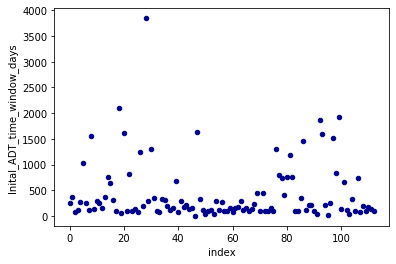

In [207]:
gap = df4[["Inital_ADT_time_window_days"]].reset_index()
ax=gap.plot.scatter(x= "index", y="Inital_ADT_time_window_days", c='DarkBlue')
print(gap.max())
print(gap.min())

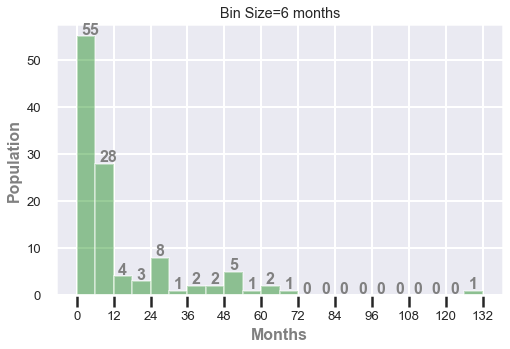

In [217]:
###plot the ADT window histogram

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=180

bins=np.arange(0, 4000, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#n=df_results['Inital_ADT_time_window_days'].plot(kind = "hist", bins=bins, color="purple", alpha=0.5)
(n, bins, patches) = plt.hist(gap["Inital_ADT_time_window_days"], bins=bins,color="green", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize/30)) +" months")
plt.xlabel("Months", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 4000, 360))
ax.set_xticklabels(np.arange(0, 133, 12))


# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()


index      112.00
Tvalue    1083.86
dtype: float64
index     0.00
Tvalue    2.64
dtype: float64


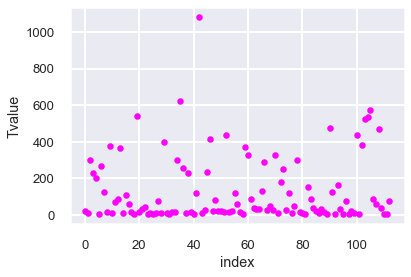

In [218]:
Tvalue = df4[["Tvalue"]].reset_index()
ax=Tvalue.plot.scatter(x= "index", y="Tvalue", c='Magenta')
print(Tvalue.max())
print(Tvalue.min())

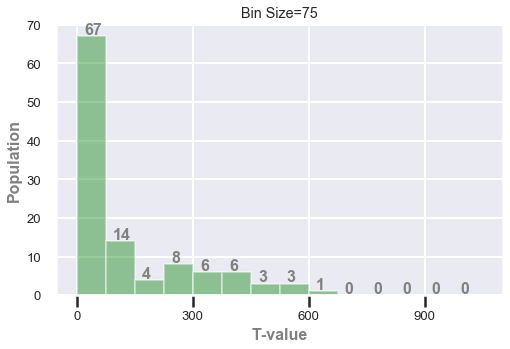

In [222]:
###plot the T value histogram

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=75

bins=np.arange(0, 1100, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#n=df_results['Inital_ADT_time_window_days'].plot(kind = "hist", bins=bins, color="purple", alpha=0.5)
(n, bins, patches) = plt.hist(Tvalue["Tvalue"], bins=bins,color="green", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize)))
plt.xlabel("T-value", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 1100, 300))
ax.set_xticklabels(np.arange(0, 1100, 300))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()



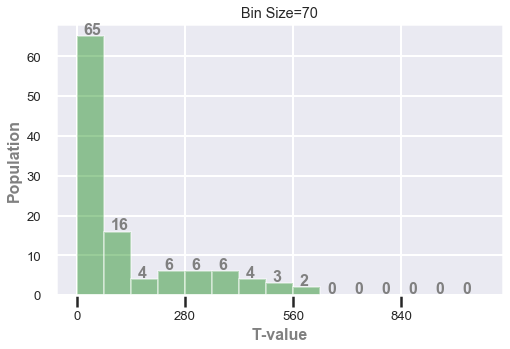

In [226]:
###plot the T value histogram

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=70

bins=np.arange(0, 1100, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#n=df_results['Inital_ADT_time_window_days'].plot(kind = "hist", bins=bins, color="purple", alpha=0.5)
(n, bins, patches) = plt.hist(Tvalue["Tvalue"], bins=bins,color="green", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize)))
plt.xlabel("T-value", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 1100, 280))
ax.set_xticklabels(np.arange(0, 1100, 280))


# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()




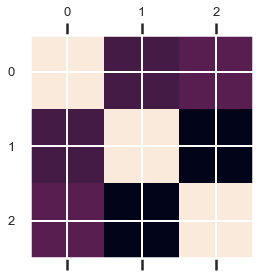

In [223]:
Correlation = df4[["Inital_ADT_time_window_days","Tvalue"]].reset_index()
plt.matshow(Correlation.corr())

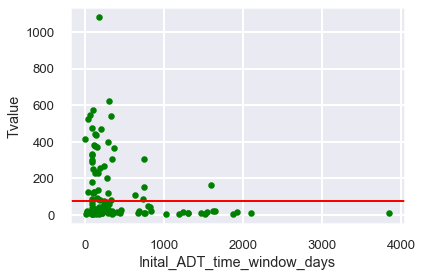

In [228]:
ax=Correlation.plot.scatter(x= "Inital_ADT_time_window_days", y="Tvalue", c='green')
plt.axhline(y=75, color='r', linestyle='-')
